#<i>Herschel</i> Reference Survey Exploratory Analysis: Casey 2012 Model Fits

This notebook takes a look at the fitting results for the <i>Herschel</i> Reference Survey galaxies using the model from Casey 2012.

Prior distributions for parameters:
* $\beta$: Fixed at 2.0
* $T_{dust}$: Uniform prior between 0 and 100 K
* $M_{dust}$: Uniform prior between 10 and $10^{10}$ $M_{\odot}$
* $\log\,N_{pl}$: Uniform prior between -10 and 10
* $\alpha$: Uniform prior between -5 and 5
* $\lambda_{turn}$: Gaussian prior with $\mu=45\,\mu\mathrm{m}$ and $\sigma=20\,\mu\mathrm{m}$. 

Best fit parameters and uncertainties are located in the file 'final_fit_results_beta_fixed_2_wturn_gaussianPrior_hrs.csv'

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn

sn.set_context('notebook')
sn.set_style('darkgrid')

In [2]:
# Upload the fitting results
hrs_fits = pd.read_csv('/Users/ttshimiz/Github/bat-agn-sed-fitting/analysis/casey_bayes_results/hrs_beta_fixed_2_wturn_gaussianPrior/final_fit_results_beta_fixed_2_wturn_gaussianPrior_hrs.csv', index_col=0)

Lets look at the best fit parameter distributions.

First 8-1000 micron luminosity:

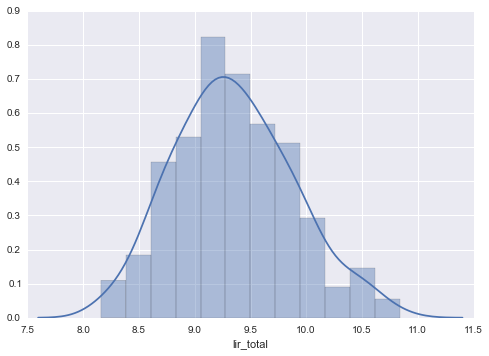

In [3]:
sn.distplot(hrs_fits['lir_total'])

Looks like a Gaussian distribution with a slight tail towards high luminosity. Median looks to be out $10^{9.25} L_{\odot}$ with a spread of about 0.5 dex. Let's confirm this.

In [4]:
print 'Median LIR = ', hrs_fits['lir_total'].median()
print 'Sigma LIR = ', hrs_fits['lir_total'].std()

Median LIR =  9.304949911
Sigma LIR =  0.532379428942


Now lets break it up into the two components: LBB and LPL which are the greybody and powerlaw components.

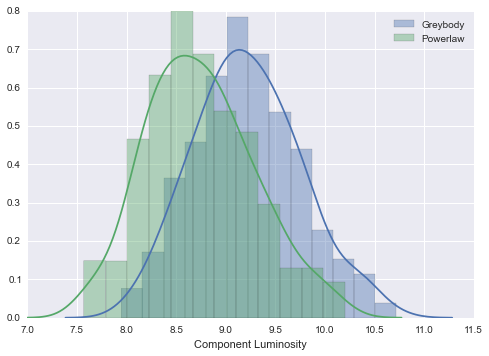

In [5]:
ax = sn.distplot(hrs_fits['lir_bb'])
sn.distplot(hrs_fits['lir_powlaw'])
ax.set_xlabel('Component Luminosity')
ax.legend(['Greybody', 'Powerlaw'])

Clearly the most of the luminosity is contained in the greybody component as expected. Let's look at their median and spread.

In [6]:
print 'Median Greybody LIR = ', hrs_fits['lir_bb'].median()
print 'Sigma Greybody LIR = ', hrs_fits['lir_bb'].std()
print ''
print 'Median Powerlaw LIR = ', hrs_fits['lir_powlaw'].median()
print 'Sigma Powerlaw LIR = ', hrs_fits['lir_powlaw'].std()

Median Greybody LIR =  9.186248218
Sigma Greybody LIR =  0.536755624416

Median Powerlaw LIR =  8.698731608
Sigma Powerlaw LIR =  0.542407458519


With a median greybody LIR of 9.2 and powerlaw LIR of 8.7 it looks like the median ratio between is about $10^{0.5} \sim 3.0$. Let's look at the distribution of the ratio.

In [7]:
hrs_fits['LIR_ratio'] = 10**hrs_fits['lir_bb']/10**hrs_fits['lir_powlaw']

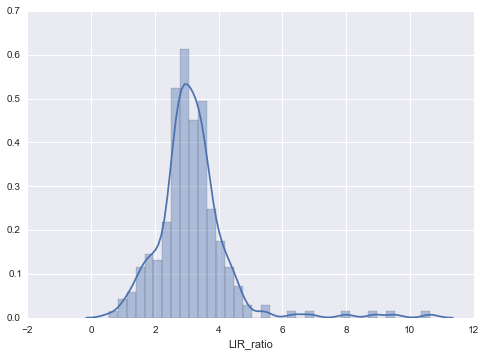

In [8]:
sn.distplot(hrs_fits['LIR_ratio'])

In [9]:
print 'Median LIR ratio = ', hrs_fits['LIR_ratio'].median()
print 'Sigma LIR ratio = ', hrs_fits['LIR_ratio'].std()

Median LIR ratio =  3.02521957583
Sigma LIR ratio =  1.17524226172


Looks like the ratio is a fairly constant value over all of the HRS galaxies. However there is a long tail towards high values. Lets see if the values change if we remove some of the outliers. For this I'll use the sigma_clipped_stats function in Astropy.

In [10]:
from astropy.stats import sigma_clipped_stats

In [11]:
mean_ratio, median_ratio, std_ratio = sigma_clipped_stats(hrs_fits['LIR_ratio'])

In [12]:
print 'Median LIR Ratio = ', median_ratio
print 'Sigma LIR Ratio = ', std_ratio

Median LIR Ratio =  3.0218454576
Sigma LIR Ratio =  0.781056804991


The median didn't change at all however the standard deviation definitely got a bit smaller changing from 1.2 to 0.8.
If we assume that the majority of the HRS galaxies don't contain an AGN, then this ratio represents the amount of the 8-1000 micron luminosity that is due to star formation rather than the AGN. We can use this ratio to correct our calculations of the star-forming luminosity in the BAT AGN. Meaning that when we decompose our BAT AGN into the greybody and powerlaw component, we can't assume that all of the luminosity in the powerlaw component is associated with the AGN. Instead the amount of the luminosity that we need to subtract from the powerlaw luminosity is 1/3 the greybody luminosity. To calculate the SFR, we need to multiply the greybody luminosity by 4/3. 

Let's look at the $T_{dust}$ and $M_{dust}$ distributions to get an idea of the properties of the sample.

In [13]:
print 'Median Tdust = ', hrs_fits['tdust'].median()
print 'Sigma Tdust = ', hrs_fits['tdust'].std()
print ''
print 'Median Mdust = ', hrs_fits['mdust'].median()
print 'Sigma Mdust = ', hrs_fits['mdust'].std()

Median Tdust =  21.42880301
Sigma Tdust =  2.81723410325

Median Mdust =  6.872345876
Sigma Mdust =  0.55074925841


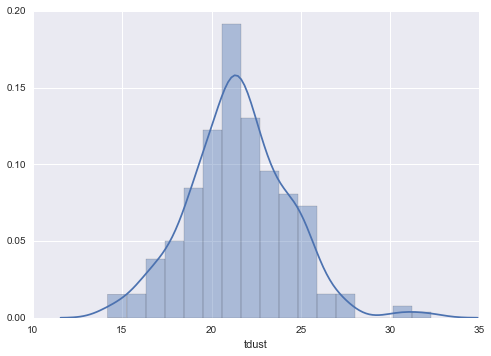

In [14]:
sn.distplot(hrs_fits['tdust'])

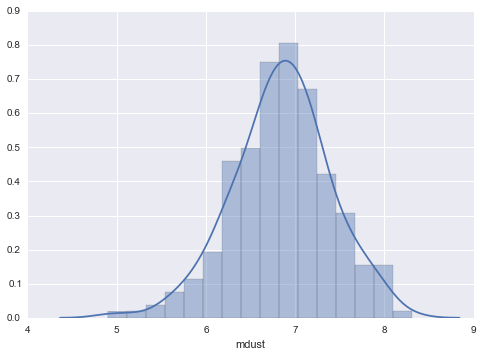

In [15]:
sn.distplot(hrs_fits['mdust'])

So the average dust temperature is about 21 K and the dust mass is about $10^7$ solar masses. Cortese+2014 also fit all of the HRS galaxies with a single greybody, calculating the dust temperature and mass. We can see how well our fits agree with theirs. Thankfully they use the same values of absorption coefficient and normalization so the dust mass values should be comparable. 

The Cortese+14 fits are located in a VOTable in the file '/Users/ttshimiz/Dropbox/Research/Thesis/Other_surveys/HRS/cortese_2014_table3.vot'. To upload the data, I will use the astropy.io.votable package.

In [16]:
from astropy.io.votable import parse_single_table

In [17]:
cortese_fits = parse_single_table('/Users/ttshimiz/Dropbox/Research/Thesis/Other_surveys/HRS/cortese_2014_table3.vot')
cortese_fit_data = cortese_fits.array
cortese_tdust = cortese_fit_data['T_beta_2_']
cortese_mdust = cortese_fit_data['log_Mdust__beta_2_']

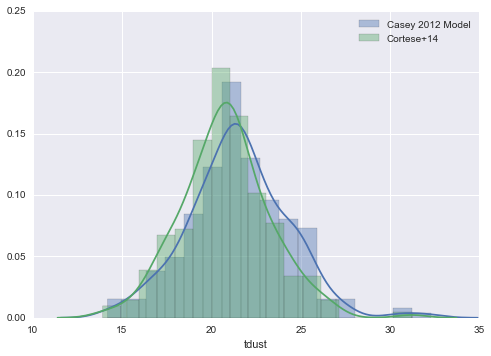

In [18]:
ax = sn.distplot(hrs_fits['tdust'], label='Casey 2012 Model')
sn.distplot(cortese_tdust[~cortese_tdust.mask], label='Cortese+14')
ax.legend()

Looks like our fitting produced slightly higher dust temperatures. Lets see what the median and sigma is for the Cortese fits.

In [19]:
print 'Median Cortese Tdust = ', np.median(cortese_tdust[~cortese_tdust.mask])
print 'Sigma Cortese Tdust = ', np.std(cortese_tdust[~cortese_tdust.mask])

Median Cortese Tdust =  20.7999992371
Sigma Cortese Tdust =  2.50126680496


Yes it looks like the median dust temperature is lower by about 0.6 K and the spread is smaller by about 0.3 K. Essentially though the two fits give basically the same dust temperature. The differences probably aren't statistically significant.

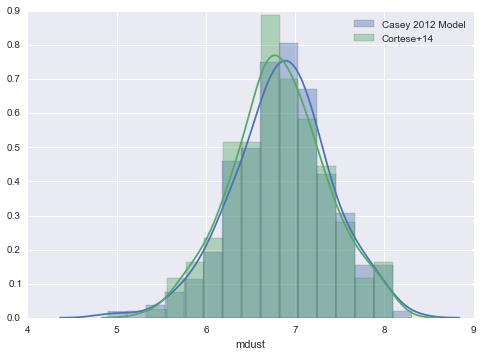

In [20]:
ax = sn.distplot(hrs_fits['mdust'], label='Casey 2012 Model')
sn.distplot(cortese_mdust[~cortese_mdust.mask], label='Cortese+14')
ax.legend()

The dust masses on the other hand look virtually the same.

In [21]:
print 'Median Cortese Mdust = ', np.median(cortese_mdust[~cortese_mdust.mask])
print 'Sigma Cortese Mdust = ', np.std(cortese_mdust[~cortese_mdust.mask])

Median Cortese Mdust =  6.80999994278
Sigma Cortese Mdust =  0.526810745392


And looking at the median and spread, they are only different by 0.06 and 0.02 dex respectively. So in the end, our model fitting is giving consistent values for the dust temperature and dust mass with using just a single greybody. Essentially the addition of the MIR powerlaw component doesn't have any effect on these parameters. 

Finally I want to look at the distribution of $\alpha$ so that we can compare with what we get for the BAT AGN.

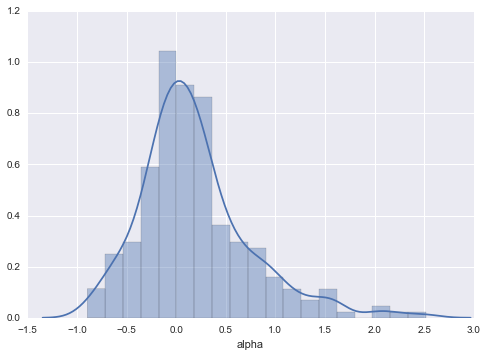

In [22]:
sn.distplot(hrs_fits['alpha'])

In [23]:
print 'Median alpha = ', hrs_fits['alpha'].median()
print 'Sigma alpha = ', hrs_fits['alpha'].std()

Median alpha =  0.098201028
Sigma alpha =  0.561772875018


So it looks fairly concetrated around a value of 0.1 with a large spread of about 0.6. Essentially the SED is quite flat in the MIR, at least between 12 and 22 micron. I can see if $\alpha$ is related to ratio of the powerlaw and greybody component.

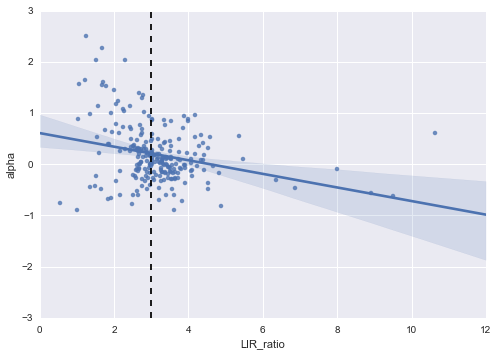

In [24]:
ax = sn.regplot(hrs_fits['LIR_ratio'], hrs_fits['alpha'])
ax.axvline(3, color='k', ls='dashed')

Indeed it does seem like as we get to smaller values of the LIR ratio (i.e. larger powerlaw component compared to greybody) alpha gets steeper and steeper. We can also see that all of the sources with $\alpha > 1.0$ occurs with LIR ratio less than 3. So it will be interesting where the BAT AGN lie in this plot. Lets see if $\alpha$ is also related to either Mdust or Tdust.

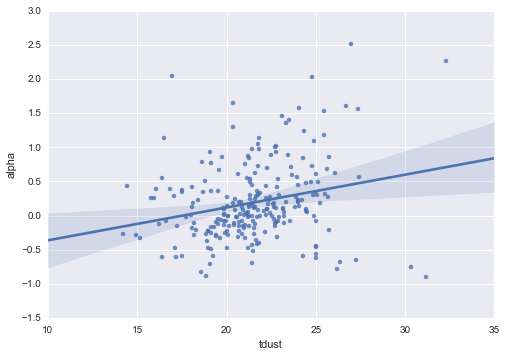

In [25]:
ax = sn.regplot(hrs_fits['tdust'], hrs_fits['alpha'])

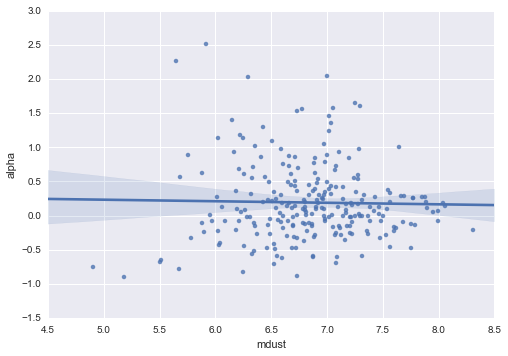

In [26]:
ax = sn.regplot(hrs_fits['mdust'], hrs_fits['alpha'])

$\alpha$ is certainly not related to the dust mass, however it dust seem to be a bit related to the dust temperature although not as clearly as the LIR ratio. Most of the sources with $\alpha > 1.0$ have dust temperatures greater than about 23 K.

I want to see which of the HRS galaxies seem to indicate a possible AGN based on the IR fit. We'll look at galaxies which has a steep MIR slope (i.e. $\alpha > 1.0) and LIR ratio less than 3.

In [30]:
ind_agn = (hrs_fits['alpha'] > 1.0) & (hrs_fits['LIR_ratio'] < 3.0)
hrs_fits[ind_agn]

,alpha,alpha_16,alpha_84,lir_bb,lir_bb_16,lir_bb_84,lir_powlaw,lir_powlaw_16,lir_powlaw_84,lir_total,...,norm_pow,norm_pow_16,norm_pow_84,tdust,tdust_16,tdust_84,wturn,wturn_16,wturn_84,LIR_ratio
Name,,,,,,,,,,,,,,,,,,,,,
115,1.132756,0.688271,1.626505,8.453540,8.423032,8.474828,8.066733,8.000966,8.151395,8.602878,...,-0.810159,-1.003400,-0.588619,21.826649,21.217052,22.419361,48.488716,31.282623,67.840029,2.436730
142,1.535740,1.405155,1.751635,9.566439,9.553524,9.586593,9.317103,9.281954,9.348503,9.760454,...,0.571596,0.488943,0.678457,25.458960,24.969042,25.912139,46.713094,34.551439,63.826482,1.775562
144,1.574576,1.469286,1.732236,9.740259,9.728112,9.755803,9.718970,9.608977,9.703383,10.030775,...,0.984649,0.913483,1.069399,24.040388,23.604951,24.456307,46.563985,36.708937,58.033868,1.050242
152,1.090188,0.898838,1.377776,9.280379,9.255417,9.311172,8.929833,8.916787,8.987018,9.440584,...,0.032606,-0.034941,0.107123,24.886553,24.394817,25.365684,47.411193,32.796750,64.945828,2.241537
156,1.234766,1.094557,1.498946,9.730786,9.712692,9.741074,9.409186,9.380152,9.474725,9.900128,...,0.550906,0.516435,0.612830,24.332424,23.961533,24.728908,44.060996,31.314544,58.990490,2.097010
184,2.518090,2.339200,2.777857,8.898252,8.839039,8.948654,8.800965,8.695153,8.881329,9.153357,...,0.253864,0.094353,0.436175,26.959697,25.583529,28.150675,42.468368,33.091067,54.564331,1.251084
196,1.045735,0.814982,1.388464,9.396906,9.362138,9.428219,9.043790,9.033965,9.116545,9.556320,...,0.130756,0.045181,0.226868,21.771349,21.187265,22.354901,47.790230,30.890005,67.455092,2.254843
203,1.457905,1.363543,1.600087,9.591957,9.576043,9.614274,9.290247,9.191613,9.335235,9.767822,...,0.629760,0.465305,0.753867,23.084216,22.555722,23.577907,69.504426,44.472027,86.881606,2.003136
205,1.000996,0.879298,1.280987,10.177142,10.175031,10.209225,9.895039,9.858606,9.932823,10.359634,...,0.992342,0.948288,1.067048,22.701556,22.360642,23.084805,56.424447,34.705024,79.315447,1.914708
